In [1]:
import copy
import pickle # store objects in files
import numpy as np # shorthand
from scipy import linalg # import object from module
from scipy import interpolate
from scipy import optimize
from scipy import stats
from scipy import integrate
from scipy import fftpack
# from numba import jit # make code faster
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1. Python scientific computing ecosystem

In [ ]:
# function info
print?
np.sum(np.arange(10))

In [ ]:
%quickref # IPython Reference Card

In [ ]:
alias

In [ ]:
%magic

In [ ]:
%whos

In [ ]:
# vars in script become available

# import my_file # does not run if __name__ == '__main__':
# %run my_file   # runs if __name__ == '__main__':

In [ ]:
%timeit range(0,10000) # line magic

In [ ]:
%%timeit # cell magic
x=0
for i in range(0,10000):
    x+=1

In [ ]:
# decimal digits
%precision 3
10.115599

In [ ]:
a = 1 + 2 + \
    3 + 4 # line break
a

## 1.2. The Python language

In [ ]:
print(3 > 4)
print(2**10)
print(10%3)
print(10/4, 10//4)
float(1)

In [5]:
c = 1.5 + 0.5j
print(c.real, c.imag)
type(c)

1.5 0.5


complex

#### Lists
*(use numpy array if elements have same type)*

In [ ]:
colors = ['red', False, 'green', 1000, 'white']
colors.append('pink')
colors.extend(['yellow', 'purple']) # extend list

print(colors.pop()) # remove & return last item
print(colors[-1])
print(colors[2:4])
print(colors[2:])
print(colors[1:6:2], '\n') # begin:end:step

rcolors = colors[::-1] # reverse
print(rcolors)
print(sorted(rcolors[2::2]))
print(colors*2)
print(colors+rcolors, '\n')

l = [i for i in range(4)]
print(l)
type(colors)

#### Tuples
*(immutable lists)*

In [ ]:
t = 'a', 100, 'b'
t2 = (0, 2, 'c')
print(t, t2, t[0])
type(t)

#### Strings
*(behave like immutable lists)*

In [ ]:
s = '''multi line
string'''
for word in s.split():
    print(word)

s = 'hello'
s2 = s.replace('l', 'z', 1)
s3 = 'An integer: %i; a float: %.3f; a string: %s' % (1, 0.1, 'string')

print(s3)
print(s + s2, s2*2, s[::2])
type(s)

#### Dictionaries
*(unordered)*

In [ ]:
d = {'a': 0.1, 'b': 0.2, 3: 'c'}
d['d'] = 100

for key, val in d.items():
    print(key, val)
print()

print(d)
print(d.keys())
print(d.values())
print(d['b'], 'b' in d)
type(d)

#### Sets
*(unordered - unique items)*

In [ ]:
s = set(('a', 'b', 'c', 'a')) # only 1 'a'
print(s)
print(s.difference(('a', 'b')))
type(s)

#### Control Flow

In [ ]:
x = [0, 1, 2, 3]
y = x # pointer copy
w = x[:] # shallow copy (creates different object)
z = copy.deepcopy(x) # (creates different object)

print(x, y, w, z)
x[1] = 'a'
w[2] = 'b'
z[3] = 'c'
print(x, y, w, z)

print(2 in x)
print(x is y)
print(1 is 1)
print(1 is 1.0)

In [ ]:
x = 1
if x == -1:
    print('if')
elif x >= 2:
    print('elif')
else:
    print('else')

In [ ]:
for x in range(2):
    for y in 'hat':
        for z in ('a', 'b', 'c'):
            
            if z == 'b':
                continue    
            print('%d %s %s' % (x, y, z), end='\t')
print('\n')

for index, item in enumerate(['a', 'b', 'c']):
    print(index, item)

In [ ]:
z = 0
while z < 10:
    if z == 8:
        break
    z += 1
print(z)

#### Functions
*(if default values are mutable types, changes persist in next calls)*

In [ ]:
x = 10
def func(y):
    global x # to modify var inside function
    x = 1

func(x)
print(x)

_\*args: any number of positional args in tuple_

_\*\*kwargs: any number of keyword args in dictionary_

In [ ]:
def func(*args, **kwargs):
    """Concise one-line sentence describing function.

    Extended summary.
    """
    print(args)
    print(kwargs)

f = func # functions are objects: can be assigned or passed as arg
f('F', 2, a=1, b=2, c=3)
type(func)
func?

In [ ]:
func = lambda x, y: x * y # anonymous function
func2 = lambda a, b: a if (a > b) else b
func3 = lambda a, b: [a for i in range(b)]

print(func(5, 6), func2(5, 6), func3(5, 6))

#### Input / Output

    Read-only: r
    Write-only: w (creates/overwrites file)
    Append: a
    Read and Write: r+
    Binary mode: b (for binary files)

In [ ]:
f = open('data/testfile.txt', 'w')
f.write('Test \nfile')
f.close()

type(f)

In [ ]:
f = open('data/testfile.txt', 'r')
s = f.read() # f reaches EOF
print(s)

for line in f: # f starts at EOF because of f.read() -> does nothing
     print(line)

f.close()

In [ ]:
l1 = [1, None, 'a']
pickle.dump(l1, open('data/stored_obj.pkl', 'wb')) # store object in binary file

In [ ]:
l2 = pickle.load(open('data/stored_obj.pkl', 'rb'))
l2

###### NumPy Input / Output

In [ ]:
a = np.arange(10)
np.savetxt('data/testfile2.txt', a, '%i',
           header='header \nsubheader',
           footer='footer')
np.save('data/testfile3.npy', a) # not portable but efficient

data  = np.loadtxt('data/testfile2.txt', int)
data2 = np.genfromtxt('data/testfile2.txt', int) # for incomplete data
data3 = np.load('data/testfile3.npy')
print(data, data2, data3, sep='\n')

In [ ]:
img = plt.imread('data/elephant.png')
print(img.shape, img.dtype)

plt.imshow(img)
plt.savefig('data/elephant_plot.png')
plt.imsave('data/elephant_gray.png', img[:,:,0], cmap=plt.cm.gray)
plt.show()

#### Exceptions

In [ ]:
# try/except block
while True:
    try:
        x = float(input('Enter a number: '))
        break
    except ValueError:
        print('Not a valid number. Try again.')
print(x)

In [ ]:
# capture and reraise exception
name = input('Enter a name: ')
try:
    name = name.encode('ascii')
except UnicodeError as e:
    if name == 'João':
        print('OK, João')
    else:
        raise e
print(name)

#### Classes

In [ ]:
class Student(object): # base class
    status = 'student' # attribute

    def __init__(self, name, age=0, major=None):
        self.name = name
        self.age = age
        self.major = major
    def set_age(self, age): # method
        self.age = age
    def set_major(self, major):
        self.major = major
    def get_bio(self):
        print('I am %s, %i year old %s. I study %s' \
              % (self.name,self.age,self.status,self.major))

joao = Student('João')
joao.set_age(22)
joao.set_major('Physics')
joao.get_bio()

In [ ]:
class MasterStudent(Student): # inheritance from Student class
    def __init__(self, name, age=0, major=None, thesis=None):
        # if ommited, parent __init__ is used
        Student.__init__(self, name, age, major) # initialize parent object
        self.thesis = thesis
    def set_thesis(self, thesis):
        self.thesis = thesis
    def get_bio(self):
        print('I am %s, %i year old %s. I study %s and am doing my thesis in %s' \
              % (self.name,self.age,self.status,self.major,self.thesis))

james = MasterStudent('James', 23, 'Maths', 'QuInfo')
james.get_bio()

## 1.3. NumPy: numerical data

#### NumPy arrays
*(faster than lists - easier to manipulate - only allow one data type)*

In [ ]:
# np.lookfor('create array') # keyword search on docstrings

In [ ]:
L = range(1000)
%timeit [i**2 for i in L]

a = np.array(L)
%timeit a**2 # only faster for big arrays

In [ ]:
a = np.array([0, 1, 2, 3, 4, 5])
b = np.array([[0, 1, 2], [3, 4, 5]])
c = np.array([[[1], [2]], [[3], [4]]])

print(a.ndim, len(a), a.shape)
print(b.ndim, len(b), b.shape)
print(c.ndim, len(c), c.shape, '\n')

a[1] = 2.8  # float truncated to int
d = a + 0.1 # a changes to floats
e = a.astype(float)
f = np.around(d, 0) # rounds to 0 decimals. Still floats!
print(a, d, e, f, '', sep='\n')

print(b[1,1], b[1][1], '\n') # same!

br = b[::-1] # reverse lines
print(b, br, sep='\n')
type(a)

###### Evenly spaced

In [ ]:
a = np.arange(10) # end
b = np.arange(1, 9, 3) # start, end (exclusive), step
print(b)

###### By number of points

In [4]:
a = np.linspace(0, 1, 6) # start, end (inclusive), #points
b = np.linspace(0, 1, 5, endpoint=False)
print(a)

[0.  0.2 0.4 0.6 0.8 1. ]


###### Common matrices

In [ ]:
a = np.ones((3, 3))
b = np.zeros((2, 2))
c = np.eye(3) # 3x3 identity
d = np.diag([1, 2, 3, 4])
e = np.triu(a, 1) # zeros below 1st diagonal
f = np.tril(a, -1) # zeros above -1st diagonal

f2 = f.T # same as np.transpose(f) -> creates view!
f2[2,2] = 2 # also in f!

g = np.empty((2,3)) # does not initialize entries!
print(a, b, c, d, e, f, f2, g, sep='\n\n')

###### Tiles

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.tile(a, (2,3))
print(b)

###### Random

In [ ]:
np.random.seed()         # uses current time as seed
a = np.random.rand(3,2)  # uniform in [0, 1]
b = np.random.randn(2,2) # Gaussian
c = np.random.randint(1, 10, (3,2,2))
print(a, b, c, '', sep='\n\n')

np.random.shuffle(c) # random swap of 1st axis. In-place!
print(c)

###### Structured type

In [ ]:
a = np.zeros((4,), dtype=[('a', 'S3'), # up to 3 characters
                          ('b', int),
                          ('c', float)])
a[0] = 1
a[1][0] = 'banana'
a[1][1] = 2
a[1][2] = 2

print(a)
a.dtype

###### Copies /  Views

In [ ]:
a = np.arange(10)
b = a[::2] # creates a "view" -> way of accessing data (only in numpy!)
c = a[::2].copy() # creates different object

a[0] = 12
print(np.may_share_memory(a, b), \
      np.may_share_memory(a, c))
print(a, b, c, sep='\n')

###### Comparisons

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
d = np.array([1, 2.1, 3, 4.15])

# element-wise
print(a == b)

# array-wise
print(np.array_equal(a, b), np.array_equal(a, c))
print(np.allclose(a, d, rtol=0.02, atol=0.08)) # elements equal within tolerance
# a[i]-d[i] == atol+rtol*d[i]

# logical
a = np.array([1, 1, 0, 0])
b = np.array([1, 0, 1, 0])
print(np.logical_or(a, b), np.logical_and(a, b), sep='\n')
print(np.all(a), a.all()) # same!
print(np.any(a), a.any()) # same!

###### Masks

In [ ]:
a = np.random.randint(0, 21, 15)
mask = (a % 3 == 0) # boolean mask (element-wise comparison)

b = a[mask]
print(mask, a, b, sep='\n')

a[mask] = -1
print(a)

In [ ]:
a = np.arange(0, 100, 10)

mask = np.array([[2, 3, 2], [4, 2, 5]]) # int mask -> can have any shape if np.array
b = a[mask]
print(a, b, sep='\n')

mask2 = [9, 5, 7, 1] # list mask can only be 1D
a[mask2] = -1
print(a)

In [ ]:
a = np.arange(4)
b = np.ma.array(a, mask=[0, 1, 1, 0]) # view!
c = np.ma.array(a, mask=[0, 0, 1, 1])

b[2] = 9 # clears entry mask
b[3] = np.ma.masked # masks entry
b.filled(-1) # fill masked entries
print(a, b, c, b + c, sep='\n')
c.mask = np.ma.nomask # removes mask
print(c, '\n')

print(b.data, b.mask, b.mean(), '', sep='\n') # not all methods respect masks!

d = np.ma.sqrt([1, 0, -1, 2]) # masks invalid results
e = np.ma.log([1, 0, -1, 2])
print(d, e, sep='\n')

###### Element-wise operations

In [ ]:
a = np.arange(5) 
a += 1
b = 2**a
c = a*b
print(a, b, c, '', sep='\n')

print(np.sin(a), np.log(a), np.exp(a), '', sep='\n')

a[2:] = 9 # assigns to all elements
print(a)

###### Sums & other operations

In [ ]:
a = np.array([[1, 2, 3, 8], [5, 6, 7, 8]])
b = np.arange(4)

print(np.sum(a), a.sum()) # same!
print(a.sum(0)) # sum each column
print(a.sum(1)) # sum each row
print(np.cumsum(a))
print(a.dot(b), a @ b) # matrix multiplication (dot product)
print()

print(a.mean(), np.median(a), a.std())
print(np.mean(a, -1)) # last axis

###### Extrema

In [ ]:
a = np.array([[1, 2, 3, 8], [5, 6, 7, 8]])
print(a.min(), a.max())
print(a.argmin(), a.argmax()) # extrema's flattened index (only 1st extrema)
print(a.max(0), a.argmax(0)) # columns' extrema
print(a.max(1), a.argmax(1)) # rows' extrema

###### Shape manipulation

In [ ]:
# reshape returns view/copy "randomly"
a = np.arange(6).reshape((2, -1)) # size -1 is inferred
b = a.flatten() # Copy!
print(a, b, a.ravel(), a.T.ravel(), '', sep='\n\n') # last dim ravels “first”. View!

c = a.transpose(1, 0) # swaps dim. View!
print(a.shape, c.shape)
print(a[1, 2], c[2, 1])

In [ ]:
a = np.arange(4)
print(a[np.newaxis, :]) # add a dim (row vector)
print(a[:, np.newaxis], '\n') # add a dim (column vector)

print(np.resize(a, (2, 8)), '\n') # repeats array
a.resize((2, 8)) # pads with 0. In-place!
print(a)

###### Broadcasts
*(operations on arrays of different sizes - possible if they share 1 dim)*

In [ ]:
a = np.tile(np.arange(4), (3, 1)).T 
b = np.arange(3)
c = np.arange(4)
d = c[:, np.newaxis]

print(a + b, '\n') # 4x3 + 1x3
print(a + d, '\n') # 4x3 + 4x1
print(d + b, '\n') # 4x1 + 3x1
print(c + d)       # 1x4 + 4x1

In [ ]:
# j turns step into #points with end inclusive
a, b = np.ogrid[0:3:3j,0:5] # vectors with 2 dim!
print(a, b, a+b, '', sep='\n\n')

a, b = np.mgrid[0:3, 0:5] # matrices for when broadcasting not possible
print(a, b, a+b, sep='\n\n')

###### Sorts

In [ ]:
a = np.array([[4, 3, 5], [1, 2, 1]])

print(np.sort(a, None), '\n') # flatten before sort
print(np.sort(a, 0), np.sort(a, 1), '', sep='\n\n')
a.sort(1) # in-place sort
print(a, '\n')

c = np.array([4, 3, 1, 2])
j = np.argsort(c) # sorted indexes -> mask!
print(c[j])

#### 1D polinomials

In [20]:
p = np.poly1d([3, 2, -1]) # coeffs in decreasing powers
print(p, '\n')
print(p(0), p.order, p.coef, p.roots, '\n\n')

p2 = np.polynomial.Polynomial([-1, 2, 3]) # coeffs in increasing powers
print(p2, '\n')
print(p2(0), p2.degree(), p2.coef, p2.roots(), '\n\n')

p3 = np.poly1d([-1, 2], True) # roots
print(p3, '\n')
print(p3.order, p3.coef, p3.roots)

   2
3 x + 2 x - 1 

-1 2 [ 3  2 -1] [-1.          0.33333333] 


poly([-1.  2.  3.]) 

-1.0 2 [-1.  2.  3.] [-1.          0.33333333] 


   2
1 x - 1 x - 2 

2 [ 1. -1. -2.] [ 2. -1.]


In [21]:
p = np.poly1d([3, 2, -1])
p2 = p*p + p
print(p2.coef)

p3, remainder = (p**2 + 4) / p
print(p3.coef, remainder.coef)

print(np.square(p)) # squares individual coeffs

[ 9 12  1 -2  0]
[ 3.  2. -1.] [4.]
[9 4 1]


#### Polynomial fits

         3          2
-0.0544 x - 0.4539 x + 0.03056 x + 1.154 

[-0.05439671 -0.45392351  0.0305611   1.15398799] 

cheb([ 0.93113491 -0.00856952 -0.21551827 -0.01002273  0.0328303   0.01273891])


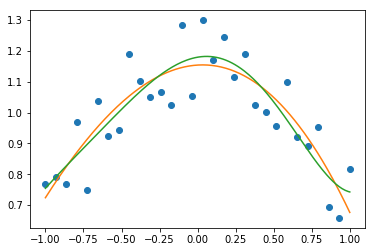

In [22]:
x = np.linspace(-1, 1, 30)
y = np.cos(x) + 0.3*np.random.rand(30)

fit = np.polyfit(x, y, 3) # coeffs array. 3rd degree
p = np.poly1d(fit)
t = np.linspace(-1, 1, 200)
print(p, '\n')
print(fit, '\n')

p2 = np.polynomial.Chebyshev.fit(x, y, 5) # Chebyshev basis
print(p2)

plt.plot(x, y, 'o')
plt.plot(t, p(t))
plt.plot(t, p2(t))
plt.show()

## 1.4. Matplotlib: plotting

#### Basic plots

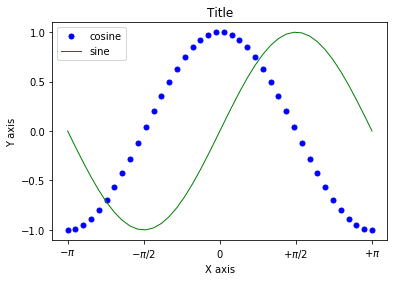

In [198]:
x = np.linspace(-np.pi, np.pi, 40)
C, S = np.cos(x), np.sin(x)

plt.plot(x, C, 'bo', markersize=5, label='cosine') # colors: b,g,r,c,m,y,k,w
plt.plot(x, S, 'g-', linewidth=1., label='sine')
plt.legend() # loc='best','upper right','lower left',...

# plt.xlim(x.min()*1.1, x.max()*1.1)
# plt.ylim(C.min()*1.1, C.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks(np.linspace(-1, 1, 5))

plt.xlabel('X axis', fontsize=10)
plt.ylabel('Y axis', fontsize=10)
plt.title('Title', fontsize=12)

plt.savefig('data/basicplot.png', dpi=200)
plt.show()

#### Advanced plots

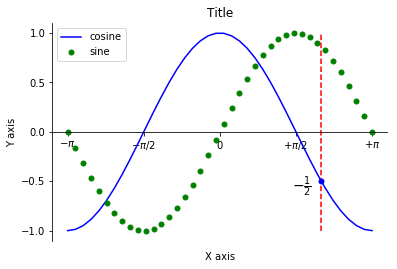

In [201]:
x = np.linspace(-np.pi, np.pi, 40)
C, S = np.cos(x), np.sin(x)

# Create window
# plt.figure(figsize=(6, 4), dpi=72) # 6x4 inches, 72 dots/inch
# plt.subplot(1, 1, 1) # new subplot "1" from 1x1 grid

plt.plot(x, C, 'b-', linewidth=1.5, label='cosine') # colors: b,g,r,c,m,y,k,w
plt.plot(x, S, 'go', markersize=5, label='sine')
plt.legend() # loc='best','upper right','lower left',...

# Moving axes
ax = plt.gca() # get current axis
ax.spines['bottom'].set_position(('data',0))
#ax.spines['left'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')

# Set limits & ticks
# plt.xlim(x.min()*1.1, x.max()*1.1)
# plt.ylim(C.min()*1.1, C.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], # raw string. '\' is not escaped
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks(np.linspace(-1, 1, 5))

plt.xlabel('X axis', fontsize=10, labelpad=100)
plt.ylabel('Y axis', fontsize=10)
plt.title('Title', fontsize=12)

# Annotate
t = 2*np.pi/3
plt.plot([t, t], [-1, 1], 'r--', linewidth=1.5)
plt.plot(t, np.cos(t), 'bo', markersize=5)
plt.annotate(r'$-\frac{1}{2}$', xy=(t-0.6, np.cos(t)-0.1), fontsize=14)
# or: plt.text(t-0.6, np.cos(t)-0.1, r'$-\frac{1}{2}$', size=14)

plt.savefig('data/advancedplot.png', dpi=200)
plt.show() # not needed with "matplotlib inline" magic!

#### Subplots

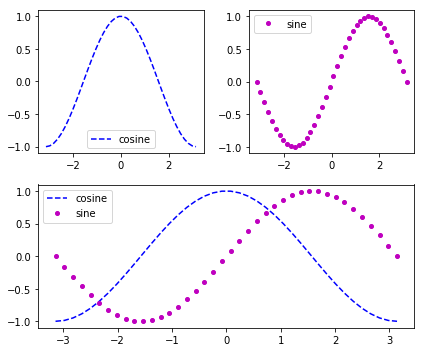

In [4]:
x = np.linspace(-np.pi, np.pi, 40)
C, S = np.cos(x), np.sin(x)

plt.figure(figsize=(6, 5), dpi=72)
plt.subplot(2, 2, 1)
plt.plot(x, C, 'b--', linewidth=1.5, label='cosine') # colors: b,g,r,c,m,y,k,w
plt.legend() # loc='best','upper right','lower left',...

plt.subplot(2, 2, 2)
plt.plot(x, S, 'm.', markersize=8, label='sine')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, C, 'b--', linewidth=1.5, label='cosine')
plt.plot(x, S, 'm.', markersize=8, label='sine')
plt.legend()

plt.tight_layout() # subplot padding
plt.savefig('data/subplots.png', dpi=200)
plt.show()

#### Axes

In [ ]:
x = np.linspace(-np.pi, np.pi, 40)
C, S = np.cos(x), np.sin(x)

plt.figure(figsize=(7, 4), dpi=72)
plt.axes()
plt.plot(x, C, 'b--', linewidth=1.5, label='cosine') # colors: b,g,r,c,m,y,k,w
plt.legend() # loc='best','upper right','lower left',...

plt.axes([0.37, 0.2, 0.3, 0.25]) # left, bottom, width, height
plt.plot(x, S, 'm.', markersize=8, label='sine')
plt.legend()

plt.show()

#### Filled plots

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
C, S = np.cos(x), np.sin(x)

plt.plot(x, C+2, 'b')
plt.fill_between(x, 2, C+2, color='blue', alpha=.25)

plt.plot(x, S, 'g')
plt.fill_between(x, 0, S, S>0, color='green', alpha=.25)
plt.fill_between(x, 0, S, S<0, color='red',  alpha=.25)

plt.show()

#### Scatter plots

In [ ]:
n = 100
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)

plt.scatter(x, y, s=60, c='b', alpha=.6)
plt.show()

#### Bar plots

In [ ]:
x = np.linspace(-np.pi, np.pi, 20)
C, S = np.cos(x), np.sin(x)

plt.bar(x,  C, 0.4, color='c', edgecolor='k')
plt.bar(x, -C, 0.4, color='y', edgecolor='w')
plt.show()

#### Contour plots

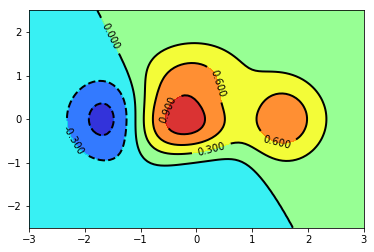

In [57]:
f = lambda x, y: (1 - x/2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 100
x = np.linspace(-3, 3, n)
y = np.linspace(-2.5, 2.5, n)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

levels = 5
plt.contourf(X, Y, Z, levels, cmap='jet', alpha=0.8)
C = plt.contour(X, Y, Z, levels, colors='black', linewidths=2)
plt.clabel(C, fontsize=10) # contour label
plt.show()

#### Image plots

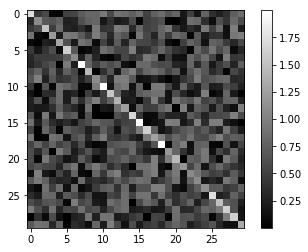

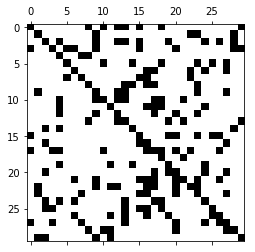

In [480]:
n = 30
image = np.eye(n) + np.random.rand(n, n)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()

plt.spy(image, precision=0.8) # shows values for which |val| > precision. works with sparse
plt.show()

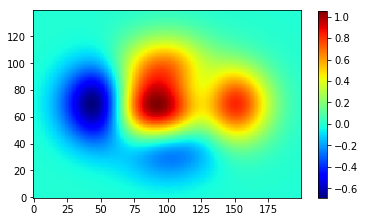

In [14]:
f = lambda x, y: (1 - x/2 + x**5 + y**3) * np.exp(-x**2 -y**2)

x = np.linspace(-3, 3, 200)
y = np.linspace(-2.5, 2.5, 140)
X, Y = np.meshgrid(x, y) # 140x200 matrices

plt.imshow(f(X, Y), cmap='jet', origin='lower')
plt.colorbar(shrink=0.86)
plt.show()

#### 3D surface plot

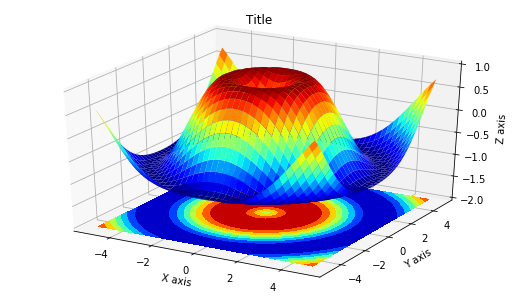

In [236]:
from mpl_toolkits.mplot3d import Axes3D
# no inline -> allows live interaction with plot
# %matplotlib

fig = plt.figure(figsize=(7, 4), dpi=72)
ax = Axes3D(fig)

x = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(x, x)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet') # stride: row/column step
ax.contourf(X, Y, Z, offset=-2, cmap='jet') # projection -> countour plot
ax.set_zlim(-2, 1)

ax.set_xlabel('X axis', fontsize=10)
ax.set_ylabel('Y axis', fontsize=10)
ax.set_zlabel('Z axis', fontsize=10)
ax.set_title('Title', fontsize=12)
plt.show()

#### Other plots

In [ ]:
f = lambda x, y: (x*x - y*y, 2*x*y)

X, Y = np.mgrid[-10:10, -8:8]
plt.quiver(X, Y, *f(X, Y), edgecolor='k', facecolor='b') # vector field."*" unpacks array
plt.show()

In [ ]:
x = [0.1, 0.1, 0.3, 0.4] # slice fractions. If sum>1, it is normalized to 1
plt.pie(x) # pie chart
plt.show()

In [ ]:
# polar bar plot
n = 23
theta = np.linspace(0, 2*np.pi, n)
radii = np.cos(theta)**2
width = 2*np.pi/(n-1)

plt.axes([0, 0, 1, 1], polar=True)
bars = plt.bar(theta, radii, width, color='c', edgecolor='k')

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r))
    bar.set_alpha(0.6)

plt.show()

## 1.5. Scipy : high-level scientific computing

###### Sub-modules
    scipy.cluster      Vector quantization / Kmeans
    scipy.constants    Physical and mathematical constants
    scipy.fftpack      Fourier transform
    scipy.integrate    Integration routines
    scipy.interpolate  Interpolation
    scipy.io           Data input and output
    scipy.linalg       Linear algebra routines
    scipy.ndimage      n-dimensional image package
    scipy.odr          Orthogonal distance regression
    scipy.optimize     Optimization
    scipy.signal       Signal processing
    scipy.sparse       Sparse matrices
    scipy.spatial      Spatial data structures and algorithms
    scipy.special      Any special mathematical functions
    scipy.stats        Statistics

#### Linear algebra routines
*linalg*

In [4]:
arr = np.array([[1, 2], [3, 4]])
det = linalg.det(arr) # raises error if singular
iarr = linalg.inv(arr)
ident = arr @ iarr

print(det, iarr, ident, np.allclose(ident, np.eye(2)), sep='\n\n')

-2.0

[[-2.   1. ]
 [ 1.5 -0.5]]

[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]

True


In [ ]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr) # arr = u @ diag(spec) @ vh -> u,vh unitaries
print(spec, uarr, vharr, sep='\n\n')

sarr = np.diag(spec)
svd_arr = uarr @ sarr @ vharr
np.allclose(svd_arr, arr)

#### Interpolation
*interpolate*

0.02164344897892545 0.02101955964646345


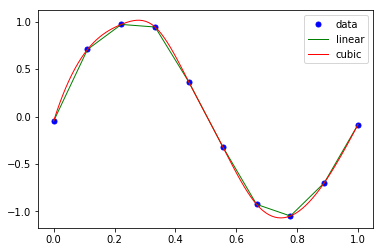

In [59]:
n = 10
x = np.linspace(0, 1, n)
noise = (np.random.random(n)*2 - 1) * 0.1
y = np.sin(2*np.pi*x) + noise

lin_interp = interpolate.interp1d(x, y) # linear interpolation
x_interp = np.linspace(0, 1, 10*n)
lin_results = lin_interp(x_interp)

cub_interp = interpolate.interp1d(x, y, kind='cubic') # cubic interpolation
cub_results = cub_interp(x_interp)
print(lin_interp(0.5), cub_interp(0.5))

plt.plot(x, y, 'bo', markersize=5, label='data')
plt.plot(x_interp, lin_results, 'g-', linewidth=1., label='linear')
plt.plot(x_interp, cub_results, 'r-', linewidth=1., label='cubic')
plt.legend()
plt.show()

#### Optimization & fits
*optimize*

[2.9338 2.0204]

[[ 0.0109 -0.0001]
 [-0.0001  0.0003]]


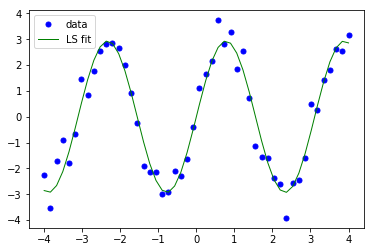

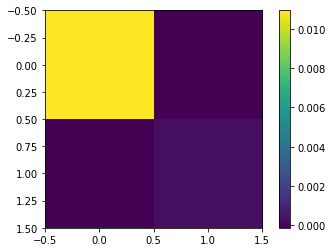

In [576]:
n = 50
x = np.linspace(-4, 4, n)
y = 3*np.sin(2*x) + 0.5*np.random.normal(size=n)

func = lambda x, a, b: a * np.sin(b*x)
p0 = (2, 2)
pars, pars_cov = optimize.curve_fit(func, x, y, p0) # least-squares fit
print(pars, pars_cov, sep='\n\n')

plt.plot(x, y, 'bo', markersize=5, label='data')
plt.plot(x, func(x, *pars), 'g-', linewidth=1., label='LS fit')
plt.legend()
plt.show()

plt.imshow(pars_cov)
plt.colorbar()
plt.show()

###### Function minimization

True
[-1.3064] [-1.3064]
-7.945823375615215 -7.9458233756152845 

True True
[0.] [-2.4795]


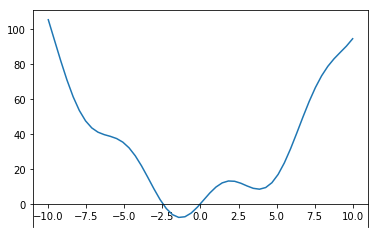

In [652]:
func = lambda x: x**2 + 10*np.sin(x)

# Find minina
x0, x1 = 0, 3
niter = 1000
step = 0.5
res1 = optimize.minimize(func, x0) # find local minimum
# try to find global minimum stochastically
res2 = optimize.basinhopping(func, x1, niter, stepsize=step)

# print(res1, res2, '\n')
print(res1.success)
print(res1.x, res2.x)
print(res1.fun, res2.fun, '\n')

# Find roots
root1 = optimize.root(func, x0=1) # find 1 root
root2 = optimize.root(func, x0=-2.5)

# print(root1, root2, '\n')
print(root1.success, root2.success)
print(root1.x, root2.x)

x = np.linspace(-10, 10, 50)
plt.plot(x, func(x))
ax = plt.gca() # get current axis
ax.spines['bottom'].set_position(('data',0))
plt.show()

True True True True True
[1. 1.] [1. 1.] [1. 1.] [1. 1.] [1. 1.] [1. 1.] [1. 1.]
1.2894345606694565e-15 4.232739297672046e-15 2.981213890612043e-10 
 2.604025049639965e-16 1.3974360938306376e-25 1.0733529013366106e-16 0.0


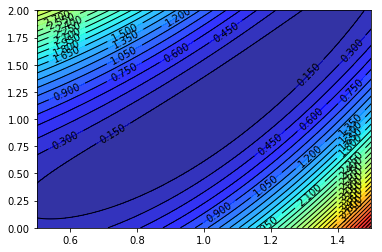

In [674]:
func = lambda x: 0.5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
constraint = lambda x: np.atleast_1d(0.5 - np.sum(np.abs(x - 1)))
jacobian = lambda x: np.array((-1 + x[0] - 4*x[0]*(x[1]-x[0]**2), 2*(x[1]-x[0]**2)))
hessian = lambda x: np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))

# Find minina
x0 = (1.2, 1.5)
xbound, ybound = (0.7, 1.3), (0.7, 1.3)
xrange, yrange = (-1, 2), (-1, 2)
# print(optimize.check_grad(func, jacobian, x0)) # check for human error

res0 = optimize.minimize(func, x0) # quasi-Newton method
res1 = optimize.minimize(func, x0, bounds=(xbound,ybound))
res2 = optimize.minimize(func, x0, constraints={"fun": constraint, "type": "ineq"}) # eq >= 0
res3 = optimize.minimize(func, x0, method='Newton-CG', jac=jacobian) # Newton’s method
res4 = optimize.minimize(func, x0, method='Newton-CG', jac=jacobian, hess=hessian) # faster!
res5 = optimize.basinhopping(func, x0, niter=1000, stepsize=0.5)
brute = optimize.brute(func, (xrange, yrange), Ns=31, full_output=True) # brute force

# print(res0, res1, res2, res5, sep='\n\n')
print(res0.success, res1.success, res2.success, res3.success, res4.success)
print(res0.x, res1.x, res2.x, res3.x, res4.x, res5.x, brute[0])
print(res0.fun, res1.fun, res2.fun, '\n', res3.fun, res4.fun, res5.fun, brute[1])

n = 100
x = np.linspace(0.5, 1.5, n)
y = np.linspace(0, 2, n)
X = np.meshgrid(x, y)
Z = func(X)

levels = 50
plt.contourf(*X, Z, levels, cmap='jet', alpha=0.8)
C = plt.contour(*X, Z, levels, colors='black', linewidths=1)
plt.clabel(C, fontsize=10) # contour label
plt.show()

#### Statistics & random numbers
*stats*

###### Histograms / Fits & PDFs / CDFs

Mean: -0.01844381160092854 
Std:  1.0082150276663415


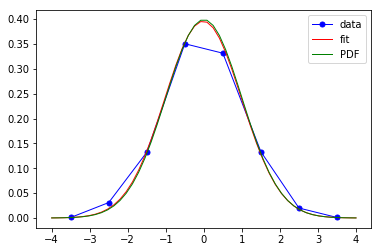

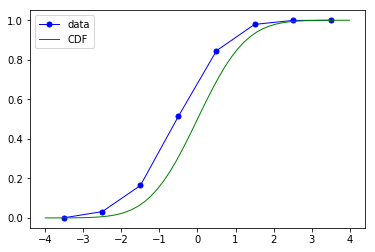

In [304]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)

hist, bin_edges = np.histogram(samples, bins, density=True) # density -> normalized hist
cumhist = np.cumsum(hist)
bins = 0.5*(bins[1:] + bins[:-1]) # bins' middle points

x = np.linspace(-4, 4, 50)
mean, std = stats.norm.fit(samples) # maximum-likelihood fit
print('Mean:', mean, '\nStd: ', std)

pdf = stats.norm.pdf(x, loc=0, scale=1) # ideal prob. distribution. loc=mean, scale=std
cdf = stats.norm.cdf(x, loc=0, scale=1) # cumulative distribution

plt.plot(bins, hist, 'b-o', linewidth=1., markersize=5, label='data')
plt.plot(x, stats.norm.pdf(x, mean, std), 'r', linewidth=1., label='fit')
plt.plot(x, pdf, 'g', linewidth=1., label='PDF')
plt.legend()
plt.show()

plt.plot(bins, cumhist, 'b-o', linewidth=1., markersize=5, label='data')
plt.plot(x, cdf, 'g', linewidth=1., label='CDF')
plt.legend()
plt.show()

###### Estimators

In [282]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
print('Mean:        ', np.mean(samples))
print('Median:      ', np.median(samples))
print('50% quantile:', stats.scoreatpercentile(samples, 50)) # 50% -> median

Mean:         0.03037453146648489
Median:       0.028352130236826076
50% quantile: 0.028352130236826076


###### T-tests

In [275]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(0, 1, size=100)
# T-test for mean of independent gaussian samples
tstat, pval = stats.ttest_ind(a, b, equal_var=True)
print(tstat, pval) # pval=1 -> identical processes. tstat -> difference between processes

-0.6686674331324864 0.5044864625779496


#### Integration
*integrate*

In [329]:
res, err = integrate.quad(np.sin, 0, np.pi/2) # definite integral
print(res, err)
print(np.allclose(res, 1), np.allclose(err, 1 - res))

x = np.linspace(0, np.pi/2, 50)
y = np.sin(x)
res2 = integrate.simps(y, x) # Simpson's rule
print(res2)

0.9999999999999999 1.1102230246251564e-14
True True
0.9999986113327112


###### ODE solver

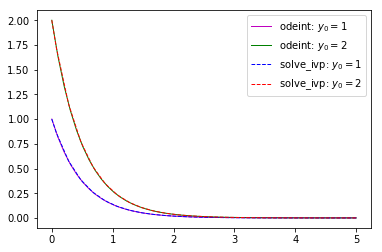

In [575]:
# y' + 2y = 0
dydt = lambda y, t: -2*y
y0 = [1, 2] # 2 different y0
t = np.linspace(0, 5, 50)
y = integrate.odeint(dydt, y0, t)
plt.plot(t, y[:,0], 'm-', linewidth=1., label=r'odeint: $y_0=1$')
plt.plot(t, y[:,1], 'g-', linewidth=1., label=r'odeint: $y_0=2$')

dydt_ivp = lambda t, y: -2*y # args -> different order!
y0 = [1, 2]
t = (0, 5)
res = integrate.solve_ivp(dydt_ivp, t, y0, max_step=0.2) # adaptive RK4/5
# print(res)
plt.plot(res.t, res.y[0], 'b--', linewidth=1., label=r'solve_ivp: $y_0=1$')
plt.plot(res.t, res.y[1], 'r--', linewidth=1., label=r'solve_ivp: $y_0=2$')
plt.legend()
plt.show()

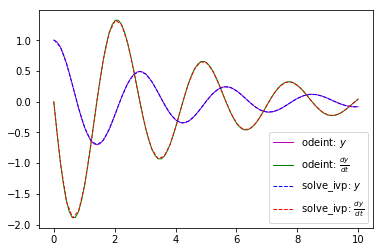

In [574]:
# y" + ay' + by = 0  ->  y' = y1 ; y1' = -ay1 - by
ode_sys = lambda y, t, a, b: (y[1], -a*y[1] - b*y[0])
a, b = 0.5, 5

y0 = (1, 0)
t = np.linspace(0, 10, 100)
Y = integrate.odeint(ode_sys, y0, t, args=(a, b))
plt.plot(t, Y[:,0], 'm-', linewidth=1., label=r'odeint: $y$')
plt.plot(t, Y[:,1], 'g-', linewidth=1., label=r'odeint: $\frac{dy}{dt}$')

y0 = (1, 0)
t = (0, 10)
res = integrate.solve_ivp(lambda t,y: ode_sys(y,t,a,b), t, y0, max_step=0.2) # adaptive RK4/5
# print(res)
plt.plot(res.t, res.y[0], 'b--', linewidth=1., label=r'solve_ivp: $y$')
plt.plot(res.t, res.y[1], 'r--', linewidth=1., label=r'solve_ivp: $\frac{dy}{dt}$')
plt.legend()
plt.show()

#### Fast Fourier transforms
*fftpack*

3 0.2 True


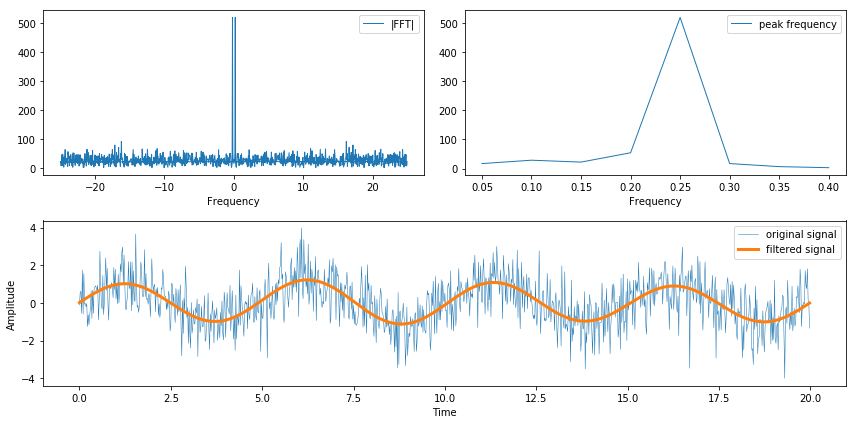

In [466]:
step = 0.02
period = 5.

t = np.arange(0, 20, step)
sig = np.sin(2*np.pi / period*t) + np.random.randn(t.size)

# Signal FFT -> complex
sig_fft = fftpack.fft(sig)
abs_fft = np.abs(sig_fft)
sig_freq = fftpack.fftfreq(sig.size, d=step) # get signal frequencies

# Find peak frequency
freq_mask = np.where(sig_freq > 0)
freqs = sig_freq[freq_mask]o
peak_arg = abs_fft[freq_mask].argmax()
peak_freq = freqs[peak_arg]
print(peak_arg, peak_freq, np.allclose(peak_freq, 1./period))

# Remove high frequencies
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0

# Inverse FFT
sig_filter = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(12, 6), dpi=72)
plt.subplot(2, 2, 1)
plt.plot(sig_freq, abs_fft, linewidth=1, label='|FFT|')
plt.xlabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
ini, end = 0, 8
plt.plot(freqs[ini:end], abs_fft[ini:end], linewidth=1, label='peak frequency')
plt.xlabel('Frequency')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, sig, linewidth=0.5, label='original signal')
plt.plot(t, sig_filter, linewidth=3, label='filtered signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout() # subplot padding
plt.show()